In [ ]:
# SIMPLE IMAGE CLASSIFICATION USING CNN
# Dataset - CIFAR10
# #classes - 10

In [5]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [31]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [32]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

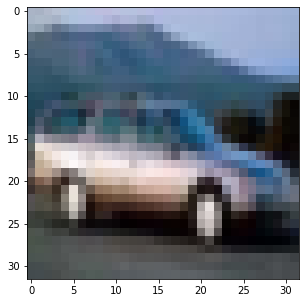

In [11]:
plt.figure(figsize=(10,5))
plt.imshow(x_train[4])

In [33]:
#Normalize the RGB values
x_train = x_train/255.0
x_test = x_test/255.0

In [60]:
#Using CNN
cnn = models.Sequential([
    # Convolution layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    # fully connected layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [61]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6902 - accuracy: 0.7591
Epoch 2/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6662 - accuracy: 0.7663
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6393 - accuracy: 0.7763
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6190 - accuracy: 0.7831
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5977 - accuracy: 0.7898
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5740 - accuracy: 0.7966
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5523 - accuracy: 0.8060
Epoch 8/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5367 - accuracy: 0.8113
Epoch 9/15
1314/1563 [========================>.....] - ETA: 3s - loss: 0.5112 - accuracy: 0.8192

In [63]:
y_predict = cnn.predict(x_test)

In [65]:
y_predict_label = [np.argmax(y) for y in y_predict]

In [66]:
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, y_predict_label))


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      1000
           1       0.85      0.77      0.81      1000
           2       0.53      0.61      0.57      1000
           3       0.56      0.43      0.48      1000
           4       0.64      0.63      0.64      1000
           5       0.55      0.63      0.59      1000
           6       0.71      0.81      0.76      1000
           7       0.77      0.69      0.72      1000
           8       0.76      0.83      0.79      1000
           9       0.78      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

